## Task 1:
***Calculate the square root of 2 without using any imported Python libs.*** <br>
### The Newton-Raphson Method [1, 2]

The Newton-Raphson algorithm does not immediately calculate the square root of any number. <br>
Instead it will, which each calculation, deliver an output which will become closer and closer to the exact <br>
square root (if it exists). To achieve this, after each calculation, the algorithm must replace _n_ with the new, <br>
more accurate approximation of the square root of *a* (where sqrt(n) times sqrt(n) = a). <br>

![Newton Algorithm [2]](./images/newton-sqrt.PNG)
<br>

In my code, I first define the satisfactory degree of precision is 10 to the power of (-10), which in decimal terms is <br>
0.0000000001 <br>
I then set n as the value passed into the function as x. <br>
I then execute a while loop that states while the absolute value of x - n times n is greater than the precision <br>
(1e10) : Keep executing the Newton algorithm. <br>
Through this method, the while loop will keep breaking down the value of n to a more precise estimation of the square <br>
root of x until it reaches 10 decimal places.  

In [1]:
def sqrt2(x):
    # set precision at 10 pow -10 
    precision = 10 ** (-10)
    n = x/2
    
    # keep iterating the algorithm until it reaches
    # satisfying precision
    while (abs(x - (n * n)) > precision):
        # Newton-Raphson algorithm
        n = (1/2) * (n + (x / n))
    
    output = "{:.100f}".format(n)
    print(output)

In [2]:
sqrt2(2)

1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000


***

## Task 2 
***Verify, using*** `scipy.stats` ***that the Chi-squared value based on the table below is approximately 24.6***
![Wiki Table](./images/wiki-table.JPG)
### The Chi-squared test for independence
Most commonly used to test for the statistical independence or association between two or more categorical variables. [3]
<br><br>
The `scipy.stats` library provides the `chi2_contingency` function which computes the chi-square statistic and p-value for the hypothesis test of independence from the frequencies in a given contingency table. 
<br><br>
**scipy.stats.chi2_contingency** [4]
* **Params**: An array containing the observed frequencies in each category. 
* **Returns**: An object containing all results in the following format:
 * *float* chi2 - The test statistic
 * *float* p - The p value of the test
 * *int* dof - Degrees of freedom
 * array - The expected frequencies based on the marginal sums of the table (under the assumption of independence).

In [3]:
import scipy.stats as stats

categories = [[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]]
chi2,p,dof,exp = stats.chi2_contingency(categories)

print(stats.chi2_contingency(categories))
print("\nChi Sqaured result: " + str(chi2)) 
print("P value: " + str(p))

(24.5712028585826, 0.0004098425861096696, 6, array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
       [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
       [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

Chi Sqaured result: 24.5712028585826
P value: 0.0004098425861096696


***

## Task 3
***Research and compare Microsoft Excel's two functions:*** `STDEV.P` ***and*** `STDEV.S`***, which perform different versions of the standard deviation calculation.*** <br/><br/>

(The standard deviation is a measure of how much the values of a set differ from the mean value of that set) 

**`STDEV.P`** [5]
* Calculates the standard deviation based on the entire population passed in as an argument. 
* It is assumed that the supplied argument is the entire population. 
* `STDEV.P` uses the following formula:  
![STDEV.P](./images/stdevp.JPG) <br/>


**`STDEV.S`** [6]
* Calculates the standard deviation based on a sample of the population passed in as an argument.
* `STDEV.S` is better suited to calculating the standard deviation of a sample because it calculates based off of `len(sample)-1`. This adjustment is a slight compensation for the fact that we are working with the sample of a population, and is supposed to provide a better estimate of the standard deviation for the entire population itself.  
* `STDEV.S` uses the following formula: 
![STDEV.S](./images/stdevs.JPG) 

**Illustrated below:**
* The actual SD of a population calculated using the formula from `STDEV.P`
* The SD of a sample of this population using the same formula from `STDEV.P`
* The more accurate estimation of the SD of the entire population when using the formula from `STDEV.S` on the sample

In [4]:
import numpy as np

# STDEV.P
def STDEVP(x):
    sd = np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
    return sd

# STDEV.S
def STDEVS(x):
    sd = np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1))
    return sd

In [5]:
population = [1, 5, 8, 12, 12, 29, 59, 59, 23, 23, 45, 34, 23, 12, 1, 2, 34, 5, 6, 4, 55]
# Sample of population
sample = [1, 5, 8, 12, 12, 45, 34, 23]

print("STDEV.P(population): " + str(STDEVP(population)))
print("STDEV.P(sample): " + str(STDEVP(sample)))
print("STDEV.S(sample): " + str(STDEVS(sample)))

STDEV.P(population): 19.05785439284698
STDEV.P(sample): 14.309088021254185
STDEV.S(sample): 15.297058540778355


***

## Task 4
***Using*** `scikit-learn`, ***apply k-means clustering Fisher's Iris dataset + explain how this model can be used to make predictions of species of iris.*** <br><br>

**`sklearn.KMeans`** [7, 8] <br>
The `kmeans` algorithm seeks to cluster data together around a specified number of *centroids* or center points. <br>
Organising data into these clusters allows us to make predictions/assumptions about existing or incoming data.  
* **Relevant Params**:
  * `n_clusters`: The number of clusters to form (in our case 3 - one for each species of Iris).

**Fisher's Iris data set** [9, 10]
* Fisher's Iris data set consists of 50 samples from each of **three** species of Iris - **Iris setosa**, **Iris virginica** and **Iris versicolor**. <br>
* Four features are measured from each sample: length + width in centimetres of the *sepals* and *petals*. <br>
* Each sample is organised in the order: [sepal length, sepal width, petal length, petal width] 

In [59]:
# Supplier of iris data set
from sklearn import datasets

# Data clustering machine learning algorithm
import sklearn.cluster as skcl

# Plotting 
import matplotlib.pyplot as plt

# Iris Data Set
iris_ds = datasets.load_iris()

sepal_data = iris_ds.data[:,:2]
petal_data = iris_ds.data[:,-2:]

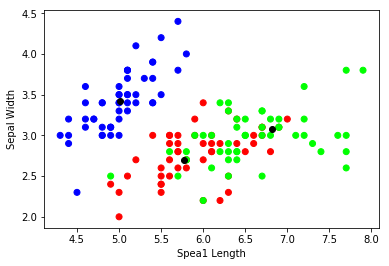

In [63]:
plt.xlabel('Spea1 Length')
plt.ylabel('Sepal Width')
# Plot out Sepal Data with respect to targets   
plt.scatter(sepal_data[:,0], sepal_data[:,1], c=iris_ds.target, cmap='brg')

# Perform kmeans on sepal data 
sepalKMeans = skcl.KMeans(n_clusters=3, random_state=0).fit(sepal_data)
sepal_centers = sepalKMeans.cluster_centers_
# identify cluster centers 
plt.plot(sepal_centers[:,0], sepal_centers[:,1], 'ko')

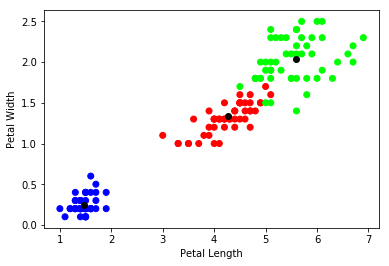

In [68]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
# Plot out Petal data
plt.scatter(petal_data[:,0], petal_data[:,1], c=iris_ds.target, cmap='brg')

# Perform kmeans on petal
petalKMeans = skcl.KMeans(n_clusters=3, random_state=0).fit(petal_data)
petal_centers = petalKMeans.cluster_centers_
# identify cluster centers 
plt.plot(petal_centers[:,0], petal_centers[:,1], 'ko')

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


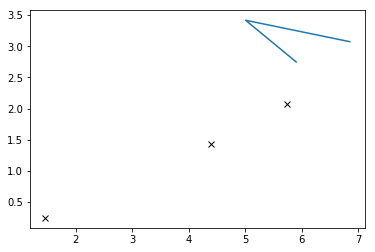

In [77]:
# Perform KMeans clustering on iris data set
kmeans = skcl.KMeans(n_clusters=3, random_state=0)
model = kmeans.fit(iris_ds.data)

centers = model.cluster_centers_
print(centers)

plt.plot(centers[:,0], centers[:,1], centers[:,2], centers[:,3], 'kx')

# plt.plot(model.labels_, 'gx')t

***

### References:
* [1] **Medium.com; Newton-Raphson Method;** https://medium.com/@surajregmi/how-to-calculate-the-square-root-of-a-number-newton-raphson-method-f8007714f64#:~:text=Algorithm,root%20and%20divide%20by%202.&text=Continue%20step%202%20until%20the,value%20(or%20precision%20value). 
* [2] **S.G. Johnson, MIT; Square Roots via Newton’s Method;** https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf 
* [3] **Kent.edu; Chi-Square Test Of Independence;** https://libguides.library.kent.edu/spss/chisquare#:~:text=The%20Chi%2DSquare%20Test%20of%20Independence%20determines%20whether%20there%20is,Chi%2DSquare%20Test%20of%20Association.
* [4] **SciPy.org; scipy.stats.chi2_contingency;** https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
* [5] **Microsoft.com; STDEV.P function;** https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285
* [6] **Microsoft.com; STDEV.S function;** https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23
* [9] **wikipedia.org; Fisher's Iris Data Set;** https://en.wikipedia.org/wiki/Iris_flower_data_set
* [10] **scikit-learn.org; The Iris Dataset;** https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
* [7] **scikit-learn.org; KMeans docs;** https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* [8] **scikit-learn.org; Clustering - Kmeans;** https://scikit-learn.org/stable/modules/clustering.html#k-means